# Data preprocessing and exploration

In [1]:
import os
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data_dir = 'C:/Users/DELL/OneDrive/Documents/Folder1/FARMACY/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

### Exploring the number of plants, diseases and each plant/disease image counts

In [3]:
# Store all the train_dir sub directory names in folders list
folders = os.listdir(train_dir)
print(folders)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [4]:
# Count the number of unique plants, number of diseases and total classes

total_class = len(folders)

plants = []
total_disease = 0

for dir_name in folders:
  if dir_name.split('___')[0] not in plants:
    plants.append(dir_name.split('___')[0])
  if dir_name.split('___')[1] != 'healthy':
    total_disease += 1

print("Total classes available: ", total_class)
print("Number of unique plants: ", len(plants))
print("Total number of diseases: ", total_disease)

Total classes available:  38
Number of unique plants:  14
Total number of diseases:  26


In [5]:
# Display per class image count

map = {}
for dir_name in folders:
  map[dir_name] = len(os.listdir(os.path.join(train_dir, dir_name)))

images_per_class = pd.DataFrame(map.values(), index = map.keys(), columns=["Number of Images"])
images_per_class

,Number of Images
Apple___Apple_scab,1516
Apple___Black_rot,1487
Apple___Cedar_apple_rust,1260
Apple___healthy,1508
Blueberry___healthy,1316
Cherry_(including_sour)___healthy,1326
Cherry_(including_sour)___Powdery_mildew,1183
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1142
Corn_(maize)___Common_rust_,1407
Corn_(maize)___healthy,1359


### Total images available for training

In [6]:
n_train = 0
for val in map.values():
  n_train += val
print("Total available images for training: ", n_train)

Total available images for training:  54263


## Data preparation

In [7]:
train_arr = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred"
)
valid_arr = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    labels="inferred"
)

Found 54263 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


Display some random images along with their classes

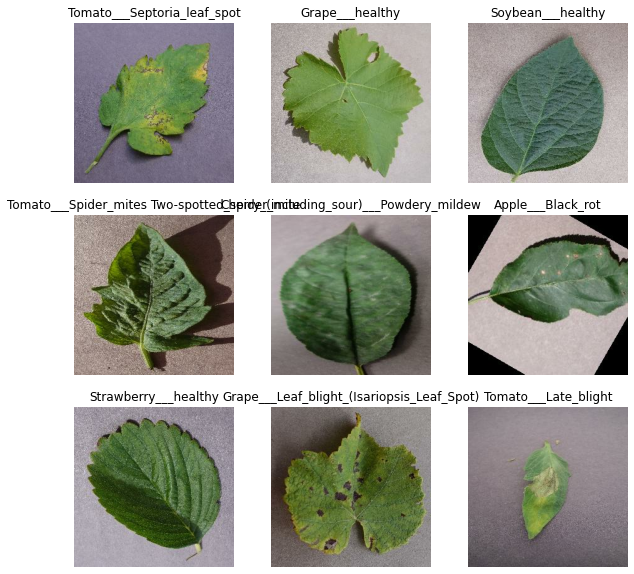

In [8]:
class_name = train_arr.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_arr.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

Dimensions of the images

In [9]:
for image_batch, labels_batch in train_arr:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

#32 classes of images with each image of size 256 x 256 x 3

(32, 256, 256, 3)
(32,)
